Importing models

In [1]:
pip install statsmodels

                                              0.0/9.9 MB ? eta -:--:--
                                              0.1/9.9 MB 1.3 MB/s eta 0:00:08
                                              0.1/9.9 MB 1.8 MB/s eta 0:00:06
                                              0.2/9.9 MB 1.6 MB/s eta 0:00:06
     -                                        0.4/9.9 MB 2.2 MB/s eta 0:00:05
     --                                       0.7/9.9 MB 2.8 MB/s eta 0:00:04
     ---                                      0.9/9.9 MB 3.1 MB/s eta 0:00:03
     ---                                      0.9/9.9 MB 3.2 MB/s eta 0:00:03
     ---                                      0.9/9.9 MB 3.2 MB/s eta 0:00:03
     -----                                    1.5/9.9 MB 3.7 MB/s eta 0:00:03
     ------                                   1.7/9.9 MB 3.5 MB/s eta 0:00:03
     -------                                  1.9/9.9 MB 3.7 MB/s eta 0:00:03
     -------                                  1.9/9.9 MB 3.7 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

import numpy as np


from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

loading dataset

In [3]:
disease_df = pd.read_csv("heart.csv")


In [5]:
disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
disease_df.drop(['thal'], inplace = True, axis = 1)
disease_df.rename(columns ={'sex':'Sex_male'}, inplace = True)
 
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.target.value_counts())

   age  Sex_male  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   52         1   0       125   212    0        1      168      0      1.0   
1   53         1   0       140   203    1        0      155      1      3.1   
2   70         1   0       145   174    0        1      125      1      2.6   
3   61         1   0       148   203    0        1      161      0      0.0   
4   62         0   0       138   294    1        1      106      0      1.9   

   slope  ca  target  
0      2   2       0  
1      0   0       0  
2      0   0       0  
3      2   1       0  
4      1   3       0   (1025, 13)
target
1    526
0    499
Name: count, dtype: int64


counting no. of patient with heart disease

C:\Users\Dell\AppData\Local\Temp\ipykernel_11016\3618298772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='target', data=disease_df,


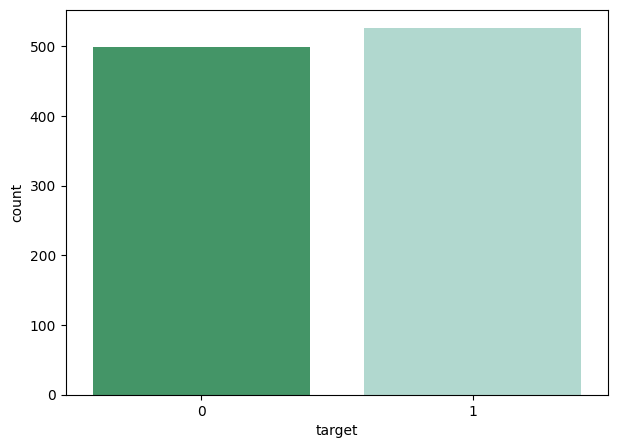

In [8]:
plt.figure(figsize=(7, 5))
sn.countplot(x='target', data=disease_df,
             palette="BuGn_r")
plt.show()

Training testing splits

In [9]:
X = np.asarray(disease_df[['age', 'Sex_male',  'cp', 
                         'trestbps',  'chol',  
                         'fbs',  'restecg',  'thalach' ]])
y = np.asarray(disease_df['target'])
 
# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
 
# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)
 
 
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (717, 8) (717,)
Test set: (308, 8) (308,)


logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
 
# Evaluation and accuracy
from sklearn.metrics import jaccard_score
 
print('')
print('Accuracy of the model in jaccard similarity score is = ', 
      jaccard_score(y_test, y_pred))


Accuracy of the model in jaccard similarity score is =  0.6735751295336787


Random forest classsifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
 
score = rf.score(X_test,y_test)*100
print('Accuracy of the model is = ', score)

Accuracy of the model is =  99.02597402597402


confusion matrix


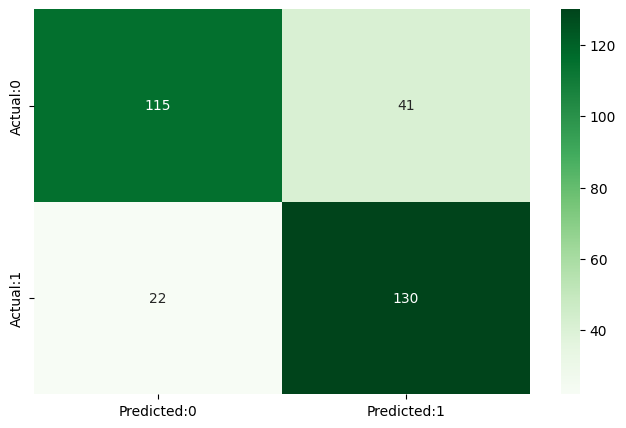

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       156
           1       0.76      0.86      0.80       152

    accuracy                           0.80       308
   macro avg       0.80      0.80      0.79       308
weighted avg       0.80      0.80      0.79       308



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
 
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
 
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
 
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))